In [182]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
pd.set_option('max_columns', 150)

In [183]:
ds = pd.read_csv("C:/Users/tvpia/Desktop/test/HSNS+DD/HSNS+DD/data.csv",sep="\t")

In [184]:
ds.head(5)

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,34,3,95,PL
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,22,2,80,AU
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,24,1,99,US
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,21,2,90,US


In [185]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53981 entries, 0 to 53980
Data columns (total 26 columns):
HSNS1       53981 non-null int64
HSNS2       53981 non-null int64
HSNS3       53981 non-null int64
HSNS4       53981 non-null int64
HSNS5       53981 non-null int64
HSNS6       53981 non-null int64
HSNS7       53981 non-null int64
HSNS8       53981 non-null int64
HSNS9       53981 non-null int64
HSNS10      53981 non-null int64
DDP1        53981 non-null int64
DDP2        53981 non-null int64
DDP3        53981 non-null int64
DDP4        53981 non-null int64
DDN1        53981 non-null int64
DDN2        53981 non-null int64
DDN3        53981 non-null int64
DDN4        53981 non-null int64
DDM1        53981 non-null int64
DDM2        53981 non-null int64
DDM3        53981 non-null int64
DDM4        53981 non-null int64
age         53981 non-null int64
gender      53981 non-null int64
accuracy    53981 non-null int64
country     53977 non-null object
dtypes: int64(25), object(1)
mem

In [186]:
ds.shape

(53981, 26)

In [187]:
ds.isnull().sum()
#there are no missing values, however some values are 0 and 0 is not a recognized answer, let's take care of this case by case

HSNS1       0
HSNS2       0
HSNS3       0
HSNS4       0
HSNS5       0
HSNS6       0
HSNS7       0
HSNS8       0
HSNS9       0
HSNS10      0
DDP1        0
DDP2        0
DDP3        0
DDP4        0
DDN1        0
DDN2        0
DDN3        0
DDN4        0
DDM1        0
DDM2        0
DDM3        0
DDM4        0
age         0
gender      0
accuracy    0
country     4
dtype: int64

In [188]:
len(ds.loc[(ds.gender == 0) |(ds.age ==0)])/ds.shape[0]*100
#Since the age and the gender may be important in the prediction, and that the missing values for those
#columns only account for 2% of the rows, I think we should drop it, sadly

1.9414238343120727

In [189]:
ds.drop(ds[ds['age'] == 0].index, inplace = True) 
ds.drop(ds[ds['gender'] == 0].index, inplace = True) 

Lets proceed with cleaning the age column, as I choose not to keep values under 13(kids personnality may still be changing, this is my own personal choice) and over 90 (these values are probably not serious since this is an onine survey and we want to keep serious answers)
These entries only account for 0.5% of remaining entries, as seen below

In [190]:
len(ds.loc[(ds.age < 13) |(ds.age > 90)])/ds.shape[0]*100

0.4231764683656698

In [191]:
ds.drop(ds[ds['age'] < 13].index, inplace = True) 
ds.drop(ds[ds['age'] > 90].index, inplace = True) 

Regarding the accuracy column, the 0s have already been removed (see codebook).
Only 35 values are above 100, lets drows these rows that may not be serious answers.

In [192]:
notacc = ds.loc[ds.accuracy > 100].index
ds.drop(notacc, inplace=True)
ds.shape

(52674, 26)

Now that the age and accuracy columns are cleaned, lets standard scale them to ease future machine learning models.

In [77]:
from sklearn.compose import ColumnTransformer, make_column_transformer


preprocess = make_column_transformer(
    (['age', 'accuracy'], StandardScaler())
)



C:\Users\tvpia\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [74]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
features = ds.iloc[:,[22,24]].values
features_scaled = sc.fit_transform(features)


Actually this can be done later easily with make column transformer, so lets it like this for the momemnt

Now lets focus on the tests answers that have 0 values. I dont to drop many rows, lets drop the rows with more than 3 missing answers.

In [121]:
ds.shape

(52674, 26)

In [143]:
ds.mask(ds==0).dropna(thresh=26,inplace=True)

In [144]:
ds.shape
#No rows seem to have 3 missing values or more



(52674, 26)

In [81]:
ds.columns.get_loc("DDM4")
#all first 22 columns are answers to the test, we want to know the number of rows that contain at least a 0 within thos columns

21

In [87]:
labels = ds.iloc[:,:22].columns
labels

Index(['HSNS1', 'HSNS2', 'HSNS3', 'HSNS4', 'HSNS5', 'HSNS6', 'HSNS7', 'HSNS8',
       'HSNS9', 'HSNS10', 'DDP1', 'DDP2', 'DDP3', 'DDP4', 'DDN1', 'DDN2',
       'DDN3', 'DDN4', 'DDM1', 'DDM2', 'DDM3', 'DDM4'],
      dtype='object')

In [106]:
ds.loc[(ds == 0).any(axis=1)]

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,24,1,99,US
10,5,5,4,3,0,5,5,5,5,5,4,5,5,5,1,1,3,3,5,5,1,4,20,1,80,US
28,5,2,4,4,4,5,3,0,4,3,5,4,4,4,4,5,3,4,4,4,4,4,34,1,90,GR
92,4,4,4,3,4,0,5,4,2,2,4,3,5,5,4,3,3,5,4,5,3,4,32,2,90,MY
95,5,5,5,4,4,5,0,5,4,5,4,4,5,5,4,4,5,3,5,4,5,4,17,1,100,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53905,5,4,4,4,5,5,3,4,4,4,4,4,2,3,0,5,3,5,5,5,5,3,18,2,65,AU
53946,4,4,4,2,2,4,2,2,4,2,4,0,4,4,2,4,4,2,2,2,2,2,27,3,90,PH
53953,2,5,4,3,1,2,5,3,1,1,1,1,1,2,1,3,1,0,2,2,1,1,19,2,100,US
53962,5,5,3,5,5,5,5,5,5,0,4,5,5,5,5,4,5,5,4,5,5,5,27,1,100,RU


In [226]:
#ds_clean.shape
#Since the rows with a 0 account for almost 10% of the data and the zero is oftentimes only a forgotten answer for one question,
#I think it is wiser to keep the data and replace the zero with the mean of the column

(49500, 26)

In [227]:
#lets use a mask to do that
#ds=ds.mask(ds==0).fillna(ds.mean())
# I reran my models after filling the 0 with means of the columns and the accuracy dropped dramatically, so I ll will go back to my original plan of deleting this data that has some zeros (about 10% of the rows)

Lets clean up the country colomn by removing nans and A1 A2 values (see codebook)

In [193]:
#I've seen that few rows are missing the countrys, let's drop them since there are only 4 and the country is important in our analysis
ds.dropna(inplace=True)

In [194]:
ds.country.unique()
#some country labeled A1, A2 should be dropped since they correspond to A1,"Anonymous Proxy" A2,"Satellite Provider"
# Get names of indexes for which column country has values A1 or A2
wrongcountry = ds[ (ds['country'] == "A1") | (ds['country']=="A2") ].index
 
# Delete these row indexes from dataFrame
ds.drop(wrongcountry , inplace=True)

Now that the basic cleaning is performed, let's create a column with the result of the the HSNScale (first test) for all entries

In [195]:
ds["HSNScale"]= round(ds.iloc[:,0:9].sum(axis=1)*2/100,2)

In [215]:
#ds.reset_index(drop=True,inplace=True)
#ds.shape
#ds.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds.csv")

Lets create a new dataframe that contains flag features for all the survey questions that were not answered (value is 0)

In [196]:
labels = list(ds.iloc[:,:22].columns)
labels
#for label in labels:

for col in labels:
    ds_flagged[col] = np.where(ds[col] == 0, 1, 0)




In [197]:
ds_flagged = ds_flagged.add_suffix('_flag')

In [199]:
ds_flagged.drop(columns="HSNS1_flagged_flag",axis=1,inplace=True)

In [210]:
ds_clean = pd.merge(ds,ds_flagged,left_index=True,right_index=True)

In [211]:
ds_clean.head(5)
ds.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds.csv")

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,DDP2,DDP3,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,country,HSNScale,HSNS1_flag,HSNS2_flag,HSNS3_flag,HSNS4_flag,HSNS5_flag,HSNS6_flag,HSNS7_flag,HSNS8_flag,HSNS9_flag,HSNS10_flag,DDP1_flag,DDP2_flag,DDP3_flag,DDP4_flag,DDN1_flag,DDN2_flag,DDN3_flag,DDN4_flag,DDM1_flag,DDM2_flag,DDM3_flag,DDM4_flag
0,2,4,5,1,4,5,4,3,3,2,1,1,4,4,2,1,1,1,1,2,2,1,37,2,98,PT,0.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2,2,4,3,4,4,5,4,3,4,4,2,4,3,2,2,3,4,4,4,3,34,3,95,PL,0.64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,5,5,4,2,5,5,4,4,2,2,2,2,4,4,2,4,3,3,4,4,2,22,2,80,AU,0.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,2,2,4,5,2,2,5,2,4,2,4,0,5,5,4,1,4,2,3,4,24,1,99,US,0.54,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,3,4,5,5,5,4,5,4,3,4,3,4,4,4,2,5,2,4,4,1,5,21,2,90,US,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Let's check for high correlations in the columns

In [212]:
ds_clean.corr().unstack().sort_values(ascending = False).drop_duplicates()

DDM4_flag   DDM4_flag     1.000000
DDM4        DDM1          0.691291
HSNS8       HSNScale      0.637779
HSNS9_flag  HSNS3_flag    0.630890
HSNS1       HSNScale      0.621928
                            ...   
HSNS9       HSNS9_flag   -0.211222
HSNS1       HSNS1_flag   -0.211328
DDP4_flag   DDP4         -0.233591
DDN1_flag   DDN1         -0.244129
HSNS6_flag  HSNS6        -0.323372
Length: 1129, dtype: float64

No correlations over 0.7, which is good for us. Let's visualize this with a correlation matrix

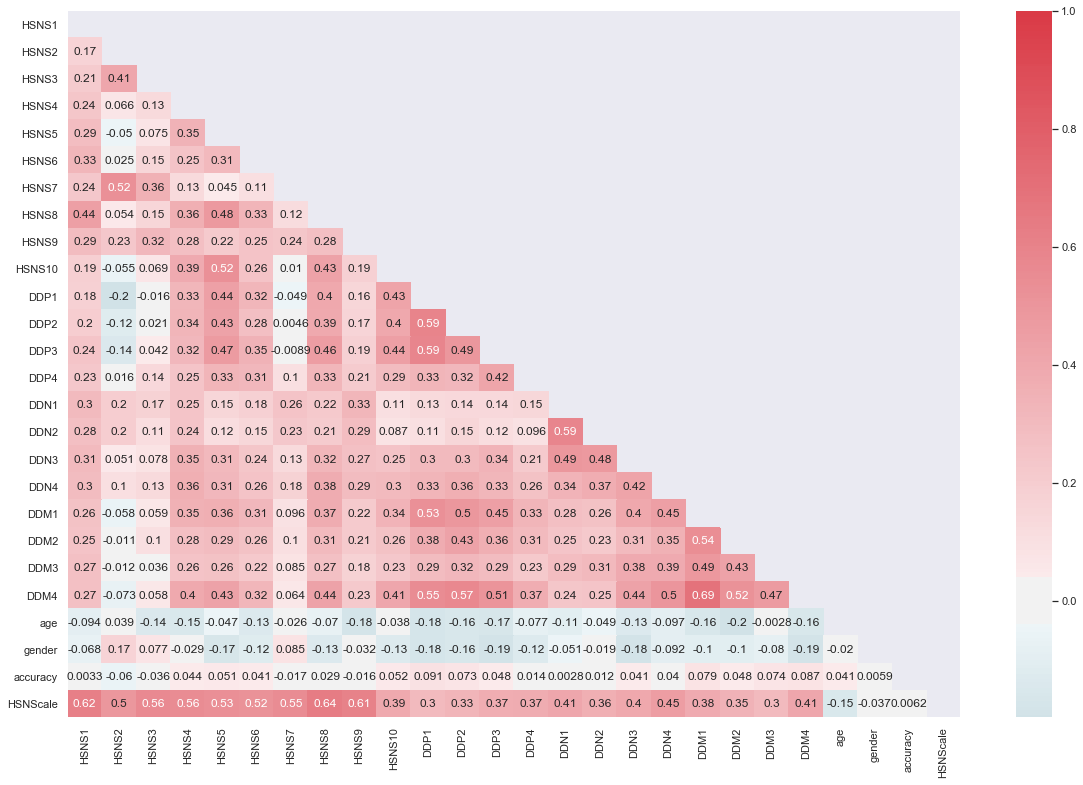

In [214]:
sns.set(color_codes = False)

corr = ds.corr()

f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap = True)
mask = np.triu(np.ones_like(corr, dtype = np.bool))
sns.heatmap(corr, cmap = cmap,mask=mask, center = 0, annot = True)

plt.show()

#add a size parameter to the plot correlation matrix heatmap when I have time

In [237]:
from collections import Counter
print(Counter(ds_clean.country))

Counter({'US': 25406, 'GB': 5646, 'CA': 3457, 'AU': 2761, 'DE': 778, 'IN': 579, 'SE': 579, 'PH': 507, 'PL': 474, 'BR': 463, 'NL': 445, 'NZ': 407, 'IE': 365, 'FI': 362, 'SG': 346, 'FR': 320, 'RO': 300, 'MX': 292, 'NO': 290, 'HR': 268, 'ZA': 266, 'DK': 211, 'ID': 209, 'IT': 197, 'BE': 196, 'ES': 171, 'GR': 150, 'RS': 148, 'PT': 147, 'MY': 143, 'HU': 118, 'BG': 108, 'AT': 107, 'RU': 106, 'CH': 101, 'TR': 97, 'CZ': 96, 'SI': 95, 'AR': 94, 'HK': 89, 'JP': 83, 'IL': 81, 'EE': 79, 'LT': 79, 'CN': 75, 'TH': 74, 'PK': 66, 'KR': 64, 'AE': 60, 'CL': 58, 'CO': 57, 'IS': 51, 'SK': 48, 'LV': 46, 'BA': 44, 'TT': 44, 'PR': 42, 'EU': 41, 'VN': 40, 'EG': 38, 'PE': 36, 'SA': 34, 'BS': 33, 'UA': 33, 'NG': 28, 'VE': 27, 'TW': 27, 'LB': 27, 'JM': 26, 'CR': 25, 'MT': 22, 'CY': 20, 'MK': 19, 'KE': 18, 'PA': 16, 'KW': 15, 'MA': 15, 'EC': 14, 'QA': 14, 'LU': 14, 'LK': 13, 'DO': 13, 'IR': 13, 'BD': 13, 'AP': 11, 'GE': 11, 'JO': 10, 'MU': 10, 'MV': 9, 'ME': 9, 'BN': 8, 'GU': 8, 'UY': 8, 'KH': 8, 'ZW': 8, 'AL': 8,

Now let's define some group of countries as target for future supervised machine learning purposes

As we can see, people from the US represent a little more than half of the total population. This makes our first classification easy (US or non US). Let's create a new column with that
US = 0
Non-US = 1

In [238]:
ds_binary = ds_clean.copy()

In [241]:
ds_binary["US/OTHER"]=np.where(ds_clean.country=="US",0,1)

In [242]:
ds_binary["US/OTHER"].value_counts(normalize=True)

0    0.519837
1    0.480163
Name: US/OTHER, dtype: float64

In [243]:
ds_binary.drop(columns="country",axis=1,inplace=True)

In [244]:
ds_binary.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_binary.csv")

Now lets create a dataframe with only the countries that have 350 + entries (the sampling should be done later, before creating the models)

In [245]:
#isolate countries that have 350+ entries
ds_bigcount = ds.groupby("country").agg({"age":'count'})
ds_bigcount = ds_bigcount.sort_values(by='age',ascending=False)
ds_bigcount = ds_bigcount[ds_bigcount["age"] > 350]
lst = list(ds_bigcount.index)


In [246]:
ds_top16 = ds.copy()

In [247]:
ds_top16 = ds_top16[ds_top16["country"].isin(lst)]

In [248]:
ds_top16.to_csv("C:/Users/tvpia/Desktop/Final project/final-project/your-project/Datasets/ds_top16.csv")
#save this csv later

Now lets create a dataframe the coutries labeled within groups based on economic system and religious past of the country

In [161]:
#first let's creat the list we will use to map our countries
Prima_cap= ["US","GB","AU","NZ"]
Cent_E=["CA","DE","FR","IT","IE","NL","BE","ES","GR","PT","HU","AT","CH"]
Nor_E =["FI","SE","NO","DK","IS"]
Sou_Am=["AR","BR","MX","CL","CO"]
India=["IN"]
Asia=["PH","ID","MY","JP","CN","TH","KR"]
Ex_com=["RO","HR","RS","BG","RU","CZ","SI","EE","LT","SK","LV","VN"]
#africa=["ZA"]
#mus=["AE"]
#PL poland catholic or ex comm 
#singapore  sg asia or prot cap, same for Hong kong HK
#turkey tr
#ISRAEL il
#pakistan pk
#bosnia BA ex comm or muslim
#TT trinidad and tobago
#pr puerto rico
#drop EU 
#stop at coutnies with 40 entries for now

In [171]:
#from collections import Counter
#print(Counter(ds.country))


In [164]:
Center_E = {x: 'Center_E' for x in Cent_E}
Nor_E = {x : 'Northern_E' for x in Nor_E}
Sou_Am = {x : 'South_Am' for x in Sou_Am}
India= {x : 'India' for x in India}
Asia = {x : 'Asia' for x in Asia}
Ex_comm = {x : 'Former_comm' for x in Ex_com}
English_speak_capitalism ={ x : "Capitalism centers" for x in Prima_cap}

zones = {**Center_E,**Nor_E,**Sou_Am,**India,**Asia,**Ex_comm,**English_speak_capitalism}
print(zones)

{'CA': 'Center_E', 'DE': 'Center_E', 'FR': 'Center_E', 'IT': 'Center_E', 'IE': 'Center_E', 'NL': 'Center_E', 'BE': 'Center_E', 'ES': 'Center_E', 'GR': 'Center_E', 'PT': 'Center_E', 'HU': 'Center_E', 'AT': 'Center_E', 'CH': 'Center_E', 'FI': 'Northern_E', 'SE': 'Northern_E', 'NO': 'Northern_E', 'DK': 'Northern_E', 'IS': 'Northern_E', 'AR': 'South_Am', 'BR': 'South_Am', 'MX': 'South_Am', 'CL': 'South_Am', 'CO': 'South_Am', 'IN': 'India', 'PH': 'Asia', 'ID': 'Asia', 'MY': 'Asia', 'JP': 'Asia', 'CN': 'Asia', 'TH': 'Asia', 'KR': 'Asia', 'RO': 'Former_comm', 'HR': 'Former_comm', 'RS': 'Former_comm', 'BG': 'Former_comm', 'RU': 'Former_comm', 'CZ': 'Former_comm', 'SI': 'Former_comm', 'EE': 'Former_comm', 'LT': 'Former_comm', 'SK': 'Former_comm', 'LV': 'Former_comm', 'VN': 'Former_comm', 'US': 'Capitalism centers', 'GB': 'Capitalism centers', 'AU': 'Capitalism centers', 'NZ': 'Capitalism centers'}


In [165]:
ds_zones =ds.copy()

In [166]:
ds_zones["Zone"]= ds_zones.country.map(zones)

In [169]:
ds_zones.Zone.value_counts()

Capitalism centers    37795
Center_E               7197
Northern_E             1622
Former_comm            1526
Asia                   1277
South_Am               1068
India                   659
Name: Zone, dtype: int64

In [170]:
ds_zones.shape

(53893, 28)

In [ ]:
#finish the mapping with the few unsure cases, drop the nans and save csv